In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
from sklearn import decomposition

In [2]:
df=pd.read_csv("secom.data",delimiter=" ",header=None)

In [3]:
df.shape

(1567, 590)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [6]:
df.isnull().sum()

0        6
1        7
2       14
3       14
4       14
5       14
6       14
7        9
8        2
9        2
10       2
11       2
12       2
13       3
14       3
15       3
16       3
17       3
18       3
19      10
20       0
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
      ... 
560      1
561      1
562    273
563    273
564    273
565    273
566    273
567    273
568    273
569    273
570      0
571      0
572      0
573      0
574      0
575      0
576      0
577      0
578    949
579    949
580    949
581    949
582      1
583      1
584      1
585      1
586      1
587      1
588      1
589      1
Length: 590, dtype: int64

### There are nulls present in the data we either ignore them or fill them. 
#### NULL values are replaced with median imputation method

In [7]:
impt_df=df.fillna(df.median())

In [8]:
impt_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.441551,2495.866110,2200.551958,1395.383474,4.171281,100.0,101.116476,0.121825,1.462860,-0.000842,...,0.004974,82.403069,0.500096,0.015317,0.003846,3.067628,0.021458,0.016474,0.005283,99.652345
std,73.480841,80.228143,29.380973,439.837330,56.103721,0.0,6.209385,0.008936,0.073849,0.015107,...,0.001985,56.348694,0.003403,0.017174,0.003719,3.576899,0.012354,0.008805,0.002866,93.864558
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,0.004700,72.288900,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,100.0,104.530000,0.123800,1.516850,0.008400,...,0.004700,72.288900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [9]:
# Columns with only one unique value after imputation, doesn't contribute to our signal
cols = impt_df.nunique()==1

In [10]:
#We can drop those columns directly
prun_data=impt_df.drop(list(impt_df.columns[cols]),axis=1)

In [11]:
prun_data.shape

(1567, 474)

In [12]:
###################################################################################################

# Principle Component Analysis

In [13]:
# Standardization
std_data=StandardScaler().fit_transform(prun_data)
std_data.shape

(1567, 474)

In [14]:
#Covariance Matrix X.X^T
covar_matrix = np.matmul(std_data.T,std_data)

In [15]:
covar_matrix.shape

(474, 474)

In [16]:
# Finding Eigen Values and Eigen Vectors
ei_values,ei_vectors = eigh(covar_matrix)

In [17]:
ei_vectors.shape

(474, 474)

In [18]:
ei_values

array([1.82132694e-12, 3.98778496e-12, 5.02953801e-12, 7.00610993e-12,
       7.98830562e-12, 2.94765628e-07, 1.03397281e-05, 1.28284433e-04,
       4.14830248e-04, 4.90169224e-04, 6.18019574e-04, 1.08672745e-03,
       2.55230422e-03, 3.71502474e-03, 3.97943661e-03, 5.47744555e-03,
       5.67069581e-03, 6.18012341e-03, 6.75068619e-03, 7.13477913e-03,
       8.08436908e-03, 1.12135379e-02, 1.33919741e-02, 1.42546723e-02,
       1.52665284e-02, 1.64840364e-02, 2.06802053e-02, 2.43945360e-02,
       2.64216193e-02, 3.00232648e-02, 3.28949102e-02, 3.54097527e-02,
       4.28791454e-02, 4.80209785e-02, 5.14296888e-02, 7.40364404e-02,
       7.78820006e-02, 8.72572776e-02, 9.35095547e-02, 1.04211154e-01,
       1.06873660e-01, 1.27039159e-01, 1.31054631e-01, 1.35328503e-01,
       1.38382097e-01, 1.48672855e-01, 1.63268517e-01, 1.71126072e-01,
       1.79155996e-01, 1.81481406e-01, 1.96681819e-01, 2.14337823e-01,
       2.24625493e-01, 2.58788682e-01, 2.71803040e-01, 2.86571094e-01,
      

In [19]:
pca = decomposition.PCA(std_data)

In [20]:
pca.n_components = 474
pca_data = pca.fit_transform(std_data)

In [21]:
pca.explained_variance_ 


array([2.63633688e+01, 1.72743886e+01, 1.33923210e+01, 1.20672691e+01,
       1.03899213e+01, 9.85089401e+00, 9.36521585e+00, 8.70194890e+00,
       8.53612401e+00, 7.69171544e+00, 6.92858488e+00, 6.31641050e+00,
       6.22095270e+00, 6.06098346e+00, 5.99357961e+00, 5.66289344e+00,
       5.46800377e+00, 5.40084730e+00, 5.31395436e+00, 5.03717250e+00,
       4.89732003e+00, 4.78918927e+00, 4.71192980e+00, 4.58288439e+00,
       4.53726627e+00, 4.47509457e+00, 4.38684780e+00, 4.21697918e+00,
       4.12895524e+00, 4.01320156e+00, 3.95271790e+00, 3.88455715e+00,
       3.83404888e+00, 3.77433459e+00, 3.66948307e+00, 3.64494209e+00,
       3.57887822e+00, 3.54935338e+00, 3.45550698e+00, 3.41105623e+00,
       3.37765422e+00, 3.29946613e+00, 3.20866391e+00, 3.17397543e+00,
       3.15647304e+00, 3.11795646e+00, 3.03698198e+00, 2.97186294e+00,
       2.95049394e+00, 2.87837110e+00, 2.85416945e+00, 2.84066647e+00,
       2.78090436e+00, 2.69371574e+00, 2.65751997e+00, 2.65199254e+00,
      

### Preserved variance ratio

In [22]:
each_pc_explained_variance_ratio=pca.explained_variance_ratio_
each_pc_explained_variance_ratio

array([5.55834276e-02, 3.64206008e-02, 2.82358113e-02, 2.54421271e-02,
       2.19056770e-02, 2.07692142e-02, 1.97452306e-02, 1.83468263e-02,
       1.79972080e-02, 1.62168921e-02, 1.46079395e-02, 1.33172566e-02,
       1.31159973e-02, 1.27787248e-02, 1.26366134e-02, 1.19394084e-02,
       1.15285112e-02, 1.13869213e-02, 1.12037198e-02, 1.06201645e-02,
       1.03253054e-02, 1.00973270e-02, 9.93443635e-03, 9.66236238e-03,
       9.56618303e-03, 9.43510281e-03, 9.24904700e-03, 8.89090309e-03,
       8.70531709e-03, 8.46126684e-03, 8.33374563e-03, 8.19003833e-03,
       8.08354882e-03, 7.95764968e-03, 7.73658511e-03, 7.68484394e-03,
       7.54555762e-03, 7.48330868e-03, 7.28544685e-03, 7.19172874e-03,
       7.12130533e-03, 6.95645683e-03, 6.76501322e-03, 6.69187746e-03,
       6.65497616e-03, 6.57376940e-03, 6.40304619e-03, 6.26575191e-03,
       6.22069840e-03, 6.06863762e-03, 6.01761187e-03, 5.98914275e-03,
       5.86314282e-03, 5.67931795e-03, 5.60300430e-03, 5.59135050e-03,
      

In [23]:
cumulative_Variance = pca.explained_variance_ratio_.cumsum()

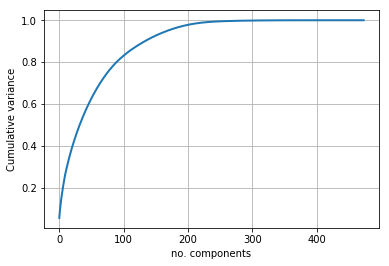

In [24]:
#plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cumulative_Variance, linewidth=2)
plt.axis('tight')
plt.grid(True)
plt.xlabel('no. components')
plt.ylabel('Cumulative variance')
plt.show()

### From the above graph we could see that approximately first 200 principal components are enough to give the entire picture of data (96-98% of variance)

In [25]:
pca.n_components=10
principal10Components = pca.fit_transform(std_data)
principalDF = pd.DataFrame(data=principal10Components,columns=['pcomp1','pcomp2','pcomp3','pcomp4','pcomp5','pcomp6','pcomp7','pcomp8','pcomp9','pcomp10'])

### Top 10 principal-components based values of their variances

In [26]:
principalDF

,pcomp1,pcomp2,pcomp3,pcomp4,pcomp5,pcomp6,pcomp7,pcomp8,pcomp9,pcomp10
0,-1.694746,2.925816,3.891682,-2.603077,-0.020071,-1.338512,-1.753064,1.825774,-0.122946,1.453012
1,-2.247275,0.877920,2.879833,-2.071652,-0.293088,-1.652245,-2.218982,1.307692,-1.670067,2.884993
2,0.443001,1.233345,1.148068,-0.396403,0.608219,2.126828,-2.195636,0.441450,-0.595191,2.792772
3,1.158451,5.126714,4.276763,-3.290344,2.736059,2.022331,-7.947657,-2.447518,11.419577,5.856773
4,0.753861,2.376134,2.541883,0.032835,1.990200,3.435785,-4.581547,-0.875678,3.406843,-2.207805
5,2.076374,2.876454,3.573294,-2.227145,1.795611,3.525996,-2.435011,2.668641,-1.377693,-1.712648
6,-1.747058,4.526094,2.857482,-1.443803,0.459120,-1.399428,-3.002709,-0.094779,0.248705,0.039041
7,1.292032,2.011522,4.730931,-2.379166,0.414892,1.442710,-2.452799,1.424325,-3.741520,1.023575
8,-0.471803,19.142445,-3.489903,3.588541,0.457632,2.549523,-0.633843,2.833092,-6.001225,-3.394050
9,1.303167,4.005929,5.711068,-2.980488,1.044435,2.473684,-2.447591,3.901581,-3.887075,2.129385


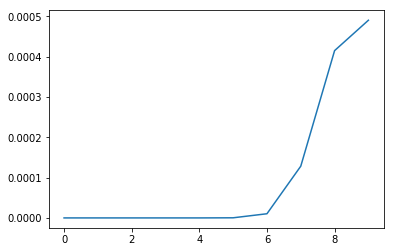

In [30]:
plt.plot(ei_values[:10])
plt.show()

Saturation point is 6 from above graph of eigen values